In [ ]:
#!pip install matplotlib
#!pip install pandas
#!pip install requests
#!pip install BeautifulSoup

1/4
1/4
1/4
1/4
1/4
1/4
1/4
1/4
1/4
1/4
1/4
1/4
1/4
1/4
1/2
1
1-3/4
2-1/2
3-1/4
4
4-1/2
['20200610', '20200729', '20200916', '20201105', '20201216', '20210127', '20210317', '20210428', '20210616', '20210728', '20210922', '20211103', '20211215', '20220126', '20220316', '20220504', '20220615', '20220727', '20220921', '20221102', '20221214']
['1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/4', '1/2', '1', '1-3/4', '2-1/2', '3-1/4', '4', '4-1/2']
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.5
1.0
1.75
2.5
3.25
4.0
4.5
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 1.0, 1.75, 2.5, 3.25, 4.0, 4.5]


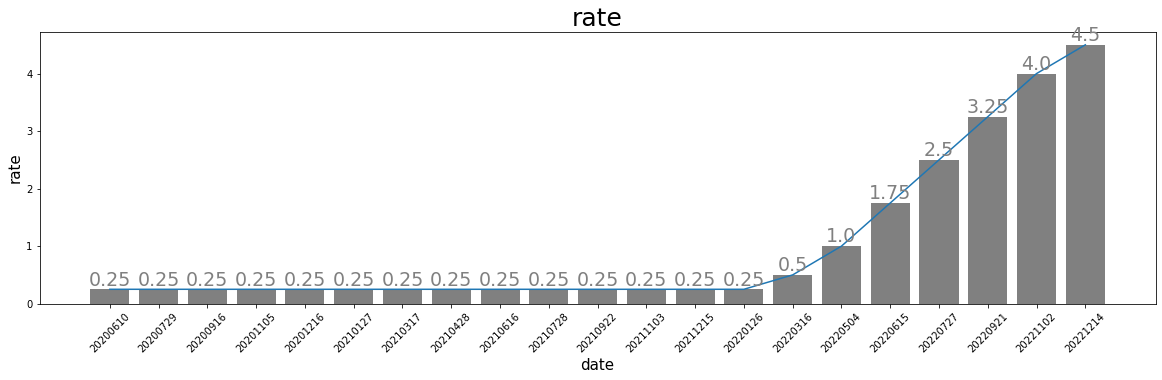

In [1]:
#조건문을 활용하여 수집 데이터를 필터링했는가
#목적을 달성하기 위한 데이터 수집에 적합한 crawling 방법을 사용하였는가
#Raw data를 사용할 수 있는 데이터로 전처리를 하였는가
#적절한 예외처리를 통해 코드의 안정성을 높였는가
#데이터를 사용해서 어떤 insight를 얻으려고 하는가
#수집한 데이터들을 시각화 기법을 통해 표현하였는가


##2020년 6월부터 지금까지의 기준금리값을 가져온다
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup
rate_data = None
DATE = ['20200610', '20200729', '20200916', '20201105', '20201216', '20210127', '20210317', '20210428', '20210616', '20210728', '20210922', '20211103', '20211215', '20220126', '20220316', '20220504', '20220615', '20220727', '20220921', '20221102', '20221214']
DATE.sort()

rate_data =[]

for i in DATE: #목적을 달성하기 위한 데이터 수집에 적합한 crawling 방법을 사용
    str(i)
    url = "https://www.federalreserve.gov/newsevents/pressreleases/monetary{0}a.htm".format(i)#문자열에 변수넣기
        
    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    text = soup.get_text()
    #여기까지 크롤링
    
    text = str(text) #전처리 시작

    #finds 라는 단어 5번째 뒤에 항상 기준금리값이있음
    text = text.split()
    interest_rate = text[text.index('funds')]

    low = text[text.index('funds')+3] #기준금리 하단
    high = text[text.index('funds')+5] #기준금리 상단
    str(rate_data.append(high))        #상단값이 실질적인 기준김리이기때문에 상단값만 사용
    
    print(high) #상단값 출력
    
    
print(DATE) #날짜값 출력
print(rate_data) #만들어진 리스트 출력

 
for i in range(len(rate_data)): #조건문을 활용하여 수집 데이터를 필터링
    rate_data[i] = rate_data[i].split('-') #금리값 가운데 "-"을 제거
    
    for j in range(len(rate_data[i])):
        
        if '1/2' in rate_data[i][j]:
            rate_data[i][j] = rate_data[i][j].replace('1/2', '0.5') #1/2는 0.25로 변환후 다시 정수형으로 변환
            
        elif '1/4' in rate_data[i][j]:
            rate_data[i][j] = rate_data[i][j].replace('1/4', '0.25') #1/2는 0.5로 변환후 다시 정수형으로 변환
            
        elif '3/4' in rate_data[i][j]:
            rate_data[i][j] = rate_data[i][j].replace('3/4', '0.75') #1/2는 0.75로 변환후 다시 정수형으로 변환
        rate_data[i][j] = float(rate_data[i][j])   
        
        


for i in range(len(rate_data)): #소숫점이 아닌경우 문자열로 변환한걸 다시 정수형으로 변환
    
    try: #예외처리
        rate_data[i]= rate_data[i][0] + rate_data[i][1]
    
    except IndexError:
        rate_data[i] = float(rate_data[i][0])
    
    
    print(rate_data[i])

print(rate_data)
DATE_index = []
for i in range(len(DATE)):
    DATE_index.append(i)
DATE_index

#Raw data를 사용할 수 있는 데이터로 전처리
pd_rate_data= pd.Series(rate_data, index=DATE_index)  #pandas data 생성

#수집한 데이터들을 시각화 기법을 통해 표현
plt.figure( figsize=(20, 5))
plt.title('rate',fontsize = 25) #제목 
plt.plot(pd_rate_data) #pandas 값 불러오기
plt.xlabel('date',fontsize = 15) #x축 제목
plt.ylabel('rate',fontsize = 15) #y축 제목
plt.xticks(rotation=45)
ax=plt.gca()
#ax.get_xaxis().set_visible(False) #x축 날짜값이 너무길어 지저분하게나와 삭제
plt.bar(DATE, rate_data, color="gray") #바차트 추가, 색깔  초록색 설정, x축 날짜 텍스트가 길어 기울이기

for i, v in enumerate(DATE): # 금리값 차트위에 표시하기
    plt.text(v, rate_data[i], rate_data[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 19, 
             color='gray',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')

plt.show()


